# <center> Linear Regression </center>

* Features: $x = (x_1, ..., x_n)$
* Target: $y$
* Training example: $(x^{(i)}, y^{(i)})$
* Training set: $\left\{(x^{(i)}, y^{(i)}); i = 1, ..., N\right\}$
* Weights: $w = (w_0, w_1, ..., w_n)$
* For convenience: $x_0 = 1$
* Hypothesis: $h (x) = w_0 + w_1x_1 + ... + w_nx_n = \sum\limits_{i = 0}^n w_i x_i = w^T x$
* Cost function: $f(w) = \frac{1}{2}\sum\limits_{i=1}^N\left(h (x^{(i)}) - y^{(i)}\right)^2$
* Learning rate: $\alpha$
* Learning step (gradient descent): $w_j = w_j - \alpha\frac{\partial f(w)}{\partial w_j} = w_j + \alpha\sum\limits_{i=1}^N\left(y^{(i)} - h (x^{(i)})\right)x_j$

# <center> 1D example </center>

## Generate training sample

In [14]:
%matplotlib inline

### IMPORTS ###

import numpy
import matplotlib.pyplot as plt

rng = numpy.random # random number generator

### SETTINGS ###

N = 100 # number of samples

a = 0.50 # slope
b = 0.50 # y-intercept
s = 0.25 # sigma

### GENERATE SAMPLES ###

X = (10.0 * rng.sample(N))                               # features
Y = [(a * X[i] + b) + rng.normal(0,s) for i in range(N)] # targets

## Plot training sample

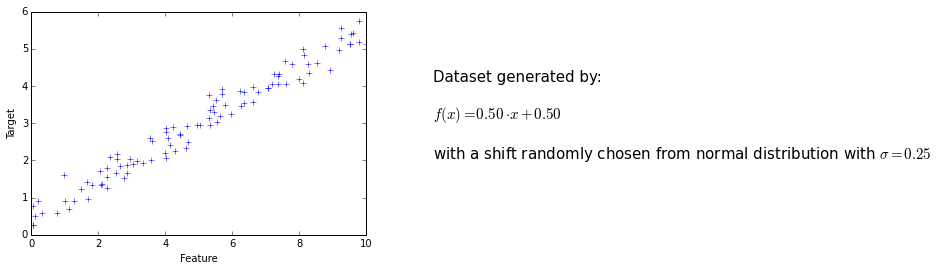

In [15]:
### PLOT SAMPLES ###

plt.xlabel('Feature')
plt.ylabel('Target')
plt.plot(X, Y, '+')
plt.text(12, 2, 'Dataset generated by:\n\n'
                '$f(x) = %.2f \cdot x + %.2f$\n\n'
                'with a shift randomly chosen from normal distribution with $\sigma = %.2f$'   
                % (a, b, s), fontsize = 15)
plt.show()

## Proceed Theano

In [16]:
### THEANO ###

import theano
import theano.tensor as T

nTrainSteps = 1000 # number of training steps

alpha = 0.01 / N # learning rate

### SYMBOLIC VARIABLES ###

x = T.vector('x') # feature vector
y = T.vector('y') # target vector

w = theano.shared(rng.randn(), name = 'w') # weights initialized randomly
b = theano.shared(rng.randn(), name = 'b') # bias term (w_0)

### EXPRESSION GRAPH ###

prediction = T.dot(x, w) + b          # hyphothesis
cost = T.sum(T.pow(prediction - y,2)) # cost function
gw, gb = T.grad(cost, [w,b])          # gradients

### COMPILE ###

# update weights based on gradients, calculalted using x,y and return cost function value
train = theano.function(inputs = [x,y],
                        outputs = cost,
                        updates = ((w, w - alpha * gw), (b, b - alpha * gb)))

### TRAIN ###

costs = [] # value of cost function in each training step

for i in range(nTrainSteps): costs.append(train(X, Y))

## Plot results

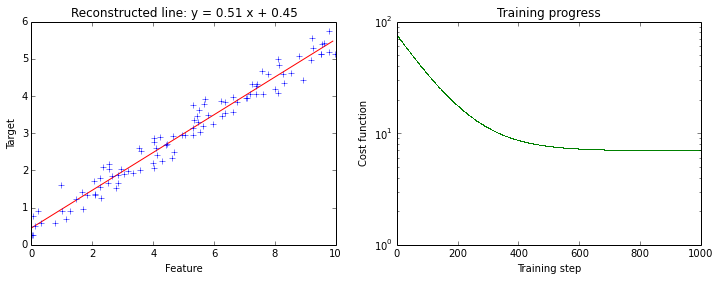

In [17]:
### PLOT RESULTS ###

fig, plots = plt.subplots(1,2) # create a 1x2 grid of plots

fig.set_size_inches((2, 1) * fig.get_size_inches()) # double horizontal size of figure

# first plot

plots[0].set_title('Reconstructed line: y = %.2f x + %.2f' % (w.get_value(), b.get_value()))
plots[0].set_xlabel('Feature')
plots[0].set_ylabel('Target')

u = numpy.arange(0, 10, 0.1)

plots[0].plot(u, w.get_value() * u + b.get_value(), 'r', X, Y, '+')

# second plot

plots[1].set_title('Training progress')
plots[1].set_xlabel('Training step')
plots[1].set_ylabel('Cost function')

steps = []
steps.extend(range(0,nTrainSteps))

plt.ylim([1, 100])
plots[1].set_yscale('log')
plots[1].plot(steps, costs, 'g,')

plt.show()